# Q3.8: MNIST - Compare 5 Optimizers

Train the same MNIST model using **SGD, Adadelta, Adagrad, Adam, RMSprop** and compare metrics.

**Exam outputs:** train/val accuracy & loss plots for each optimizer; confusion matrix (if included).

## Step 1: Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adadelta, Adagrad, Adam, RMSprop
from tensorflow.keras.utils import to_categorical

## Step 2: Load and Preprocess MNIST

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(f"Train Shape: {X_train.shape}")
print(f"Test Shape: {X_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train Shape: (60000, 28, 28, 1)
Test Shape: (10000, 28, 28, 1)


## Step 3: Define CNN Architecture

In [3]:
def create_cnn():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

## Step 4: Train with All 5 Optimizers

### Define Optimizers

In [4]:
optimizers = {
    'SGD': SGD(),
    'Adadelta': Adadelta(),
    'Adagrad': Adagrad(),
    'Adam': Adam(),
    'RMSprop': RMSprop()
}

histories = {}
epochs = 10
batch_size = 128

### Train with Each Optimizer

In [5]:
for name, opt in optimizers.items():
    print(f"\n{'='*60}")
    print(f"Training with {name} Optimizer")
    print(f"{'='*60}")

    model = create_cnn()
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train_cat,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_test, y_test_cat),
                        verbose=1)

    histories[name] = history


Training with SGD Optimizer


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.4408 - loss: 1.9201 - val_accuracy: 0.8926 - val_loss: 0.3851
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8988 - loss: 0.3482 - val_accuracy: 0.9321 - val_loss: 0.2359
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9288 - loss: 0.2372 - val_accuracy: 0.9409 - val_loss: 0.1953
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9456 - loss: 0.1830 - val_accuracy: 0.9549 - val_loss: 0.1546
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9551 - loss: 0.1531 - val_accuracy: 0.9602 - val_loss: 0.1349
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9594 - loss: 0.1320 - val_accuracy: 0.9640 - val_loss: 0.1157
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9647 - loss: 0.1177 - val_accuracy: 0.9699 - val_loss: 0.0979
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9700 - loss: 0.1024 - val_accuracy: 0.

## Step 5: Plot Training Loss Comparison

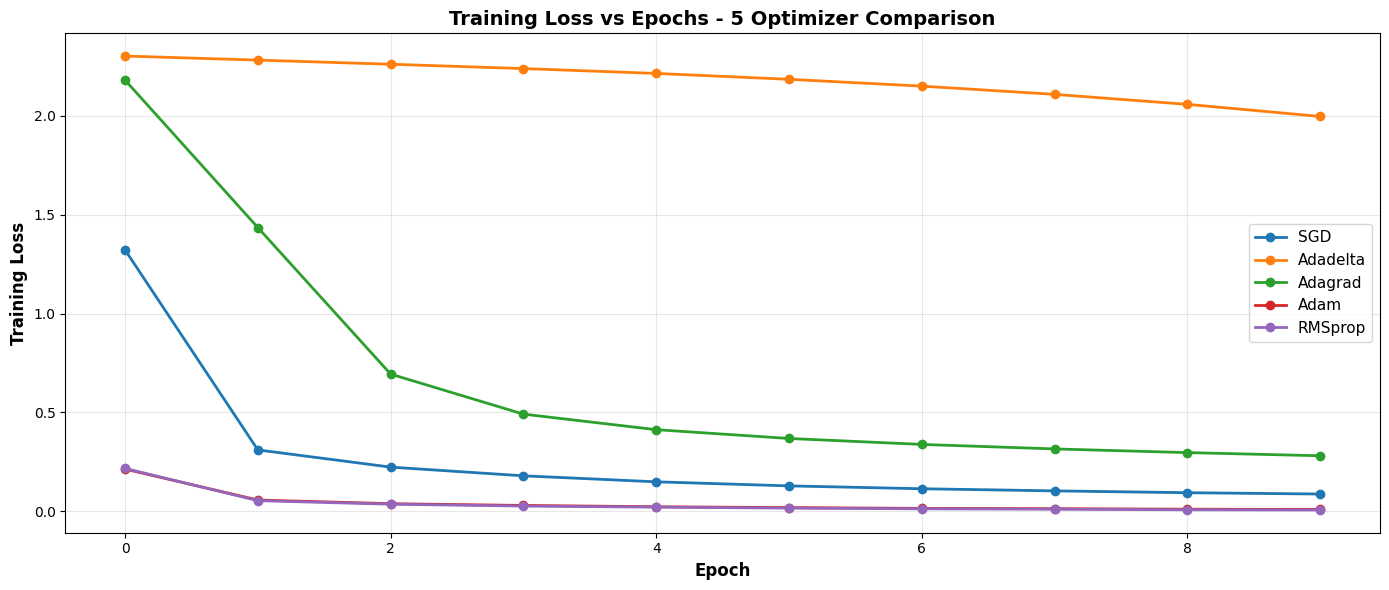

In [6]:
plt.figure(figsize=(14, 6))

for name, history in histories.items():
    plt.plot(history.history['loss'], label=name, linewidth=2, marker='o')

plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Training Loss', fontsize=12, fontweight='bold')
plt.title('Training Loss vs Epochs - 5 Optimizer Comparison', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Step 6: Plot Accuracy Comparison

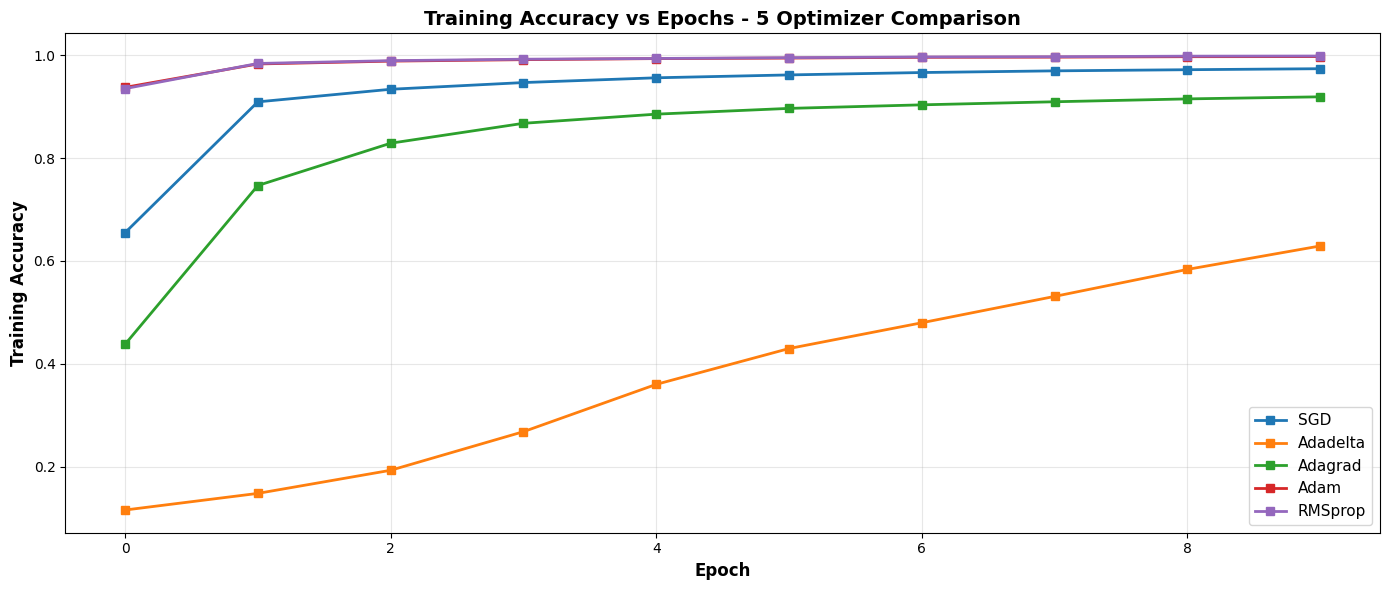

In [7]:
plt.figure(figsize=(14, 6))

for name, history in histories.items():
    plt.plot(history.history['accuracy'], label=name, linewidth=2, marker='s')

plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Training Accuracy', fontsize=12, fontweight='bold')
plt.title('Training Accuracy vs Epochs - 5 Optimizer Comparison', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Step 7: Validation Accuracy Comparison

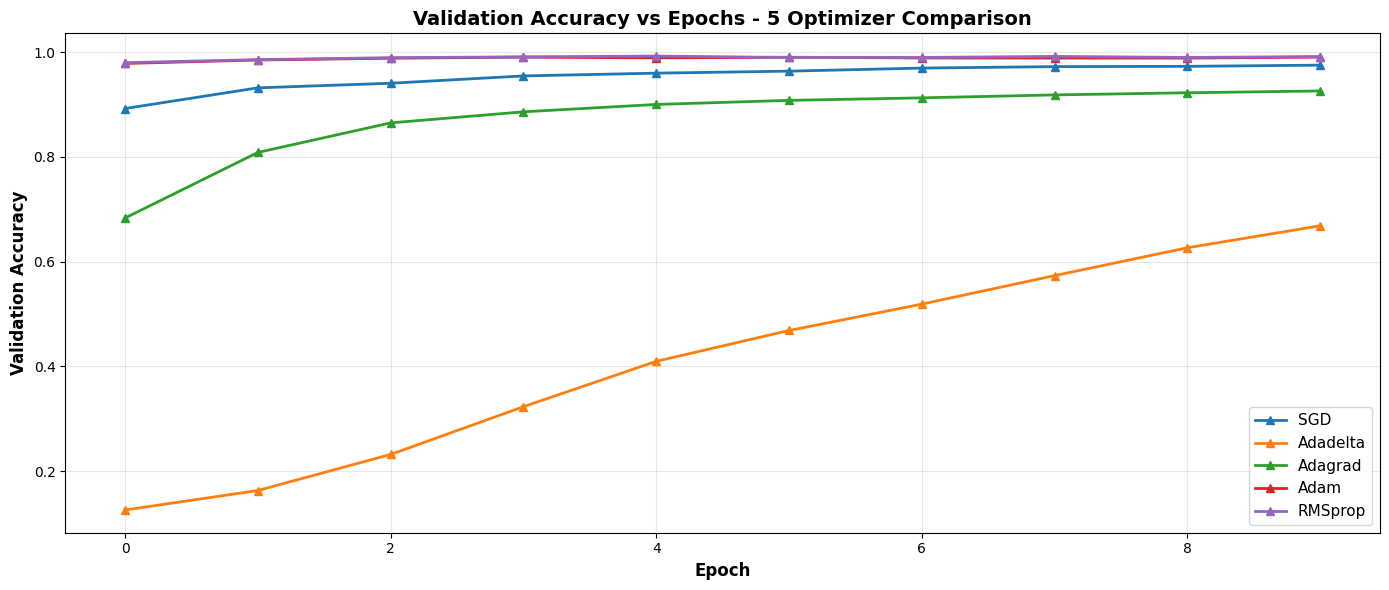

In [8]:
plt.figure(figsize=(14, 6))

for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=name, linewidth=2, marker='^')

plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Validation Accuracy', fontsize=12, fontweight='bold')
plt.title('Validation Accuracy vs Epochs - 5 Optimizer Comparison', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Step 8: Summary Table

In [9]:
print("\n" + "="*80)
print("OPTIMIZER COMPARISON SUMMARY")
print("="*80)
print(f"{'Optimizer':<12} | {'Final Train Acc':<16} | {'Final Val Acc':<16} | {'Final Loss':<12}")
print("-"*80)

for name, history in histories.items():
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    final_loss = history.history['loss'][-1]
    print(f"{name:<12} | {train_acc:<16.4f} | {val_acc:<16.4f} | {final_loss:<12.4f}")

print("="*80)


OPTIMIZER COMPARISON SUMMARY
Optimizer    | Final Train Acc  | Final Val Acc    | Final Loss  
--------------------------------------------------------------------------------
SGD          | 0.9736           | 0.9755           | 0.0863      
Adadelta     | 0.6292           | 0.6686           | 1.9976      
Adagrad      | 0.9190           | 0.9262           | 0.2800      
Adam         | 0.9972           | 0.9909           | 0.0083      
RMSprop      | 0.9983           | 0.9919           | 0.0054      


## Step 9: Bar Chart Comparison

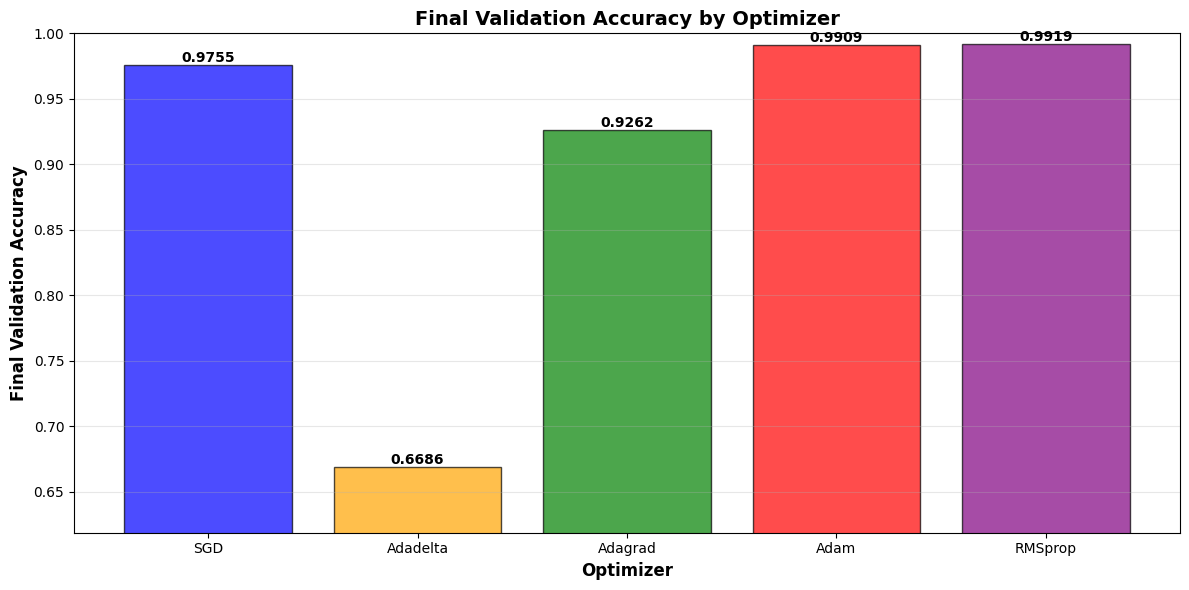

In [10]:
opt_names = list(histories.keys())
val_accs = [histories[name].history['val_accuracy'][-1] for name in opt_names]

plt.figure(figsize=(12, 6))
bars = plt.bar(opt_names, val_accs, color=['blue', 'orange', 'green', 'red', 'purple'],
               alpha=0.7, edgecolor='black')

plt.xlabel('Optimizer', fontsize=12, fontweight='bold')
plt.ylabel('Final Validation Accuracy', fontsize=12, fontweight='bold')
plt.title('Final Validation Accuracy by Optimizer', fontsize=14, fontweight='bold')
plt.ylim([min(val_accs) - 0.05, 1.0])

# Add value labels
for bar, acc in zip(bars, val_accs):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{acc:.4f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Summary

**Key Observations:**
- Adam typically converges fastest
- SGD slower but can generalize better
- Adadelta and Adagrad adapt learning rates automatically
- RMSprop balances speed and stability
- All kept constant: batch size, epochs, architecture